## Stock Prices - Time Series Analysis (Correlations)

By: Renaud Justin Beaupre

Using financial data provided by QUANDL's API, we're going to perform a correlation-specific time series analysis on the close prices for `Facebook (FB)`, `3M (MMM)`, `IBM (IBM)`, and `Amazon (AMZN)` from 2012-2017.

Afterwards, we're going to resample the data so that we can train up a variety of machine-learning and classification algorithms to help us detect outliers in the stock movement.

If you wish to use the QUANDL service, you will need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either sign up at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas_datareader.data as web

In [2]:
import quandl
quandl.ApiConfig.api_key = "7KVU4unxSGkH32E9z9N9"

In [3]:
start = datetime.datetime(2012, 7, 31)
end = datetime.datetime(2017, 6, 30)

amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end, access_key='7KVU4unxSGkH32E9z9N9')
fb = web.DataReader('WIKI/FB', 'quandl', start, end, access_key='7KVU4unxSGkH32E9z9N9')
ibm = web.DataReader('WIKI/IBM', 'quandl', start, end, access_key='7KVU4unxSGkH32E9z9N9')
mmm = web.DataReader('WIKI/MMM', 'quandl', start, end, access_key='7KVU4unxSGkH32E9z9N9')

In [4]:
amzn_adjclose_resample = amzn['AdjClose'].resample('BM').last()
fb_adjclose_resample = fb['AdjClose'].resample('BM').last()
ibm_adjclose_resample = ibm['AdjClose'].resample('BM').last()
mmm_adjclose_resample = mmm['AdjClose'].resample('BM').last() #We're going to be using the last adjusted close price of the business month ('BM') and looking at autocorrelations to understand stationarity

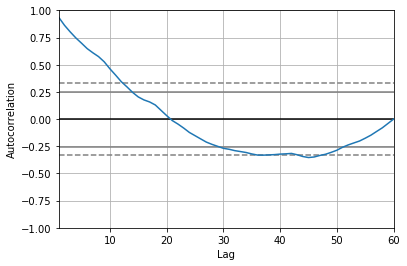

In [5]:
amzn_autocorr = pd.plotting.autocorrelation_plot(amzn_adjclose_resample)
amzn_autocorr;

In [ ]:
fb_autocorr = pd.plotting.autocorrelation_plot(fb_adjclose_resample)
fb_autocorr;

In [ ]:
ibm_autocorr = pd.plotting.autocorrelation_plot(ibm_adjclose_resample)
ibm_autocorr;

In [ ]:
mmm_autocorr = pd.plotting.autocorrelation_plot(mmm_adjclose_resample)
mmm_autocorr; #All the stocks appear to exhibit varying degrees of positive autocorrelation, as their plotted values i) form a relatively smooth and snake-like curve and ii) take on one or more significantly non-zero autocorrelation values between lag >= 0 and <= 60 at critical points on or past the 95% & 99% confidence bands

In [ ]:
amzn_return = (amzn_adjclose_resample/amzn_adjclose_resample.shift(1)-1)
fb_return = (fb_adjclose_resample/fb_adjclose_resample.shift(1)-1)
ibm_return = (ibm_adjclose_resample/ibm_adjclose_resample.shift(1)-1)
mmm_return = (mmm_adjclose_resample/mmm_adjclose_resample.shift(1)-1)

In [ ]:
amzn_return_clean = pd.Series(amzn_return.dropna(), name='amzn')
fb_return_clean = pd.Series(fb_return.dropna(), name='fb')
ibm_return_clean = pd.Series(ibm_return.dropna(), name='ibm')
mmm_return_clean = pd.Series(mmm_return.dropna(), name='mmm') #We can drop the NaNs because we're not using anything before 2012-07-31 (i.e. 2012-06-30) 

In [ ]:
amzn_autocorr_2 = pd.plotting.autocorrelation_plot(amzn_return_clean)
amzn_autocorr_2;

In [ ]:
fb_autocorr_2 = pd.plotting.autocorrelation_plot(fb_return_clean)
fb_autocorr_2;

In [ ]:
ibm_autocorr_2 = pd.plotting.autocorrelation_plot(ibm_return_clean)
ibm_autocorr_2;

In [ ]:
mmm_autocorr_2 = pd.plotting.autocorrelation_plot(mmm_return_clean)
mmm_autocorr_2; #The stocks don't show any sort of significant non-zero autocorrelation values at any lag periods... Except for AMZN which registers some significant negative autocorrelation values at lag periods ~6 and ~12

In [ ]:
stocks_concat = pd.concat([amzn_return_clean, fb_return_clean, ibm_return_clean, mmm_return_clean], axis=1)
stocks_concat

In [ ]:
scatter_stocks = pd.plotting.scatter_matrix(stocks_concat, figsize=(10,8), diagonal='hist')
scatter_stocks; #Now that we've correlated the stocks with each other, the scatter matrix doesn't appear to show any strong positive or negative correlations. There are some weaker-looking positive correlations that emerge if you look carefully at amzn-mmm and ibm-mmm but it's not that visually apparent.

In [ ]:
stocks_concat.corr() #Seems like we did pick out the strongest correlations already.

In [ ]:
import seaborn as sns

corrmat = stocks_concat.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, center=0, square=True); #So pretty